# Electric field profile #

This code plots the field profiles of a TE mode in a three-planar waveguide along the x-direction.

<br>

<div style="text-align: center;">
  <img src="planar_waveguide.png" width="300" heigth="200">
</div>

<br>

For the electric field of TE modes, we have in this waveguide:

<br>

$$
H_{z}(x) = H_{0}
\begin{cases}
  \sin(k_{f}a + \phi)e^{-\alpha_{c}(x-a)} \hspace{0.5cm};\hspace{0.2cm} x > a \\
  \sin(k_{f}x + \phi) \hspace{1.77cm};\hspace{0.1cm} |x| \le a \\
  -\sin(k_{f}a - \phi)e^{\alpha_{s}(x+a)} \hspace{0.38cm}; \hspace{0.2cm} x < -a
\end{cases}
$$

$$
H_{x}(x) = -jH_{0}\beta
\begin{cases}
  {\alpha_{c}}^{-1}\sin(k_{f}a + \phi)e^{-\alpha_{c}(x-a)} \hspace{0.5cm};\hspace{0.2cm} x > a \\
  {k_{f}}^{-1}\cos(k_{f}x + \phi) \hspace{1.77cm};\hspace{0.1cm} |x| \le a \\
  {\alpha_{s}}^{-1}\sin(k_{f}a - \phi)e^{\alpha_{s}(x+a)} \hspace{0.7cm}; \hspace{0.2cm} x < -a
\end{cases}
$$

$$
E_{y}(x) = jH_{0}\omega\beta
\begin{cases}
  {\alpha_{c}}^{-1}\sin(k_{f}a + \phi)e^{-\alpha_{c}(x-a)} \hspace{0.5cm};\hspace{0.2cm} x > a \\
  {k_{f}}^{-1}\cos(k_{f}x + \phi) \hspace{1.77cm};\hspace{0.1cm} |x| \le a \\
  {\alpha_{s}}^{-1}\sin(k_{f}a - \phi)e^{\alpha_{s}(x+a)} \hspace{0.7cm}; \hspace{0.2cm} x < -a
\end{cases}
$$

<br>

Where $k_{i} = k_{0}\sqrt{{n_{i}}^{2} - {n_{eff}}^{2}}$ for $i = c, f, s$, and $\alpha_{i} = jk_{i}$ for $i = c, s$. Note in the file _Normalized propagation constant x normalized frequency for TE and TM modes_ that $1.5 \le n_{eff} < 3.5$ for all propagating modes, be they TE or TM. This means that $k_{c}$ and $k_{s}$ are imaginary constants, so $\alpha_{c}$ and $\alpha_{s}$ are real and positive constants. 

The constant $\phi$ is given by:

$$2\phi = m\pi + \arctan{\left(\frac{w}{u}\right)} - \arctan{\left(\frac{v}{u}\right)}$$

Where $u = ak_{f}$, $w = a\alpha_{c}$, $v = a\alpha_{s}$ and $m$ is the index of the analyzed mode.

## Starting the code: ##

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Basic parameters:

nf = 3.5
ns = 1.5
nc = 1

micrometers = 1e-6

a = 0.25 * micrometers

lmbd0 = 1.55 * micrometers # frequency: f = c / lambda
k0 = 2 * np.pi / lmbd0

## Obtaining the effective indices: ##

To obtain the effective indices for a given wavelength, we calculate the normalized frequency:

<br>

$$V = k_{0}a\sqrt{{n_{f}}^{2}-{n_{s}}^{2}}$$

<br>

And use the file _Normalized propagation constant x normalized frequency for TE and TM modes_ to obtain the effective indices of the propagating modes in the waveguide.

In [68]:
import Functions as funct

V = k0 * a * np.sqrt(nf**2 - ns**2)
b = funct.b_TE_modes(V, nf, ns, nc)
neff = np.sqrt(b*(nf**2 - ns**2) + ns**2) 

kf = k0 * np.sqrt(nf**2 - neff**2)
alpha_s = k0 * np.sqrt(neff**2 - ns**2)
alpha_c = k0 * np.sqrt(neff**2 - nc**2)

u = a *kf
w = a *alpha_c
v = a *alpha_s

## Calculating the field profiles: ##

In [69]:
def phi(m):
    arctan1 = np.arctan(w[m]/u[m])
    arctan2 = np.arctan(v[m]/u[m])
    return (m*np.pi + arctan1 - arctan2)/2

def Hz(H0,x,m):
    p = phi(m)

    x = np.asarray(x)
    region1 = (x > a)
    region2 = (x < -a)
    region3 = (np.abs(x) <= a)
    
    Hz = np.zeros_like(x)

    Hz[region1] = np.sin(kf[m]*a + p) * np.exp(-alpha_c[m]*(x[region1]-a))
    Hz[region2] = -np.sin(kf[m]*a - p) * np.exp(alpha_s[m]*(x[region2]+a))
    Hz[region3] = np.sin(kf[m]*x[region3] + p)
    
    return H0 * Hz

def Hx(H0,x,m):
    beta = k0*neff[m]
    p = phi(m)

    x = np.asarray(x)
    region1 = (x > a)
    region2 = (x < -a)
    region3 = (np.abs(x) <= a)
    
    Hx = np.zeros_like(x)

    Hx[region1] = (1/alpha_c[m]) * np.sin(kf[m]*a + p) * np.exp(-alpha_c[m] * (x[region1] - a))
    Hx[region2] = (1/alpha_s[m]) * np.sin(kf[m]*a - p) * np.exp(alpha_s[m] * (x[region2] + a))
    Hx[region3] = (1/kf[m]) * np.cos(kf[m] * x[region3] + p)

    return -1j * H0 * beta * Hx

def Ey(H0,x,m):
    c = 3 * 1e8
    mu = 4*np.pi * 1e-7
    omega = 2*np.pi*c/lmbd0
    p = phi(m)

    x = np.asarray(x)
    region1 = (x > a)
    region2 = (x < -a)
    region3 = (np.abs(x) <= a)
    
    Ey = np.zeros_like(x)

    Ey[region1] = (1/alpha_c[m]) * np.sin(kf[m]*a + p) * np.exp(-alpha_c[m] * (x[region1] - a))
    Ey[region2] = (1/alpha_s[m]) * np.sin(kf[m]*a - p) * np.exp(alpha_s[m] * (x[region2] + a))
    Ey[region3] = (1/kf[m]) * np.cos(kf[m] * x[region3] + p)
    
    return 1j *H0 * omega * mu * Ey

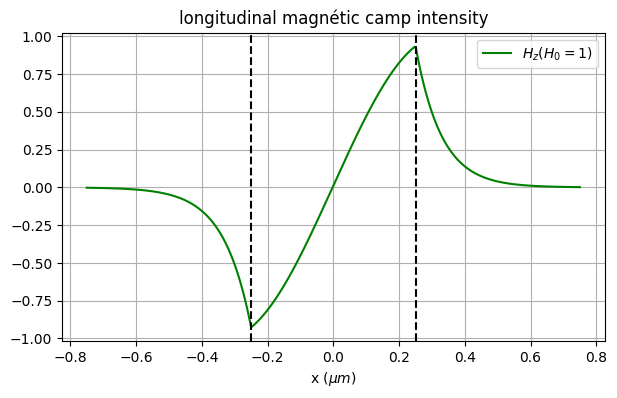

0.011473617781624035
0.9354414900516491
-0.9270844975778847


In [ ]:
x = np.linspace(-3*a, 3*a, 401)
m = 0 # TE mode visualized

hz = Hz(1,x,m)
hx = np.abs(Hx(1,x,m))
ey = np.abs(Ey(1,x,m))

plt.figure(figsize=(7,4))
plt.plot(x*1e6, hz, label = r'$H_z (H_{0} = 1)$', color = 'green')
plt.xlabel(r'x ($\mu m$)')
plt.axvline(-a * 1e6, color = 'black', linestyle = '--')
plt.axvline(a * 1e6, color = 'black', linestyle = '--')
plt.grid(True)
plt.legend(loc = 'best')
plt.title(r'longitudinal magnétic camp intensity')
plt.show()

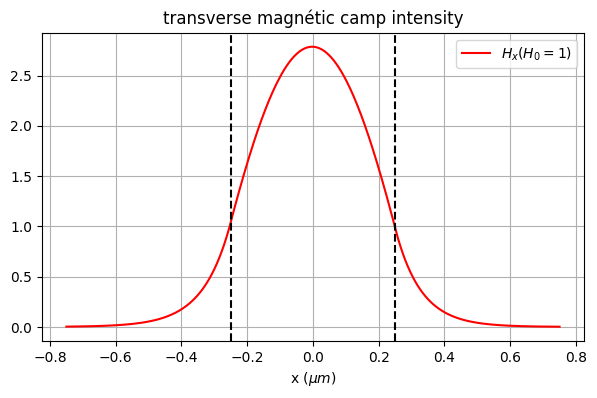

In [71]:
plt.figure(figsize=(7,4))
plt.plot(x*1e6, hx, label = r'$H_x (H_{0} = 1)$', color = 'red')
plt.xlabel(r'x ($\mu m$)')
plt.axvline(-a * 1e6, color = 'black', linestyle = '--')
plt.axvline(a * 1e6, color = 'black', linestyle = '--')
plt.grid(True)
plt.legend(loc = 'best')
plt.title(r'transverse magnétic camp intensity')
plt.show()

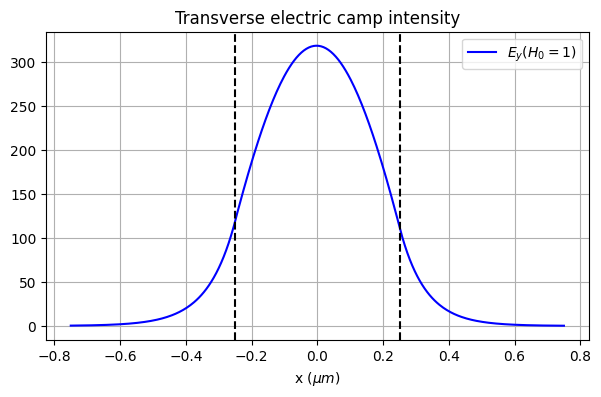

In [72]:
plt.figure(figsize=(7,4))
plt.plot(x*1e6, ey, label = r'$E_y (H_{0} = 1)$', color = 'blue')
plt.xlabel(r'x ($\mu m$)')
plt.axvline(-a * 1e6, color = 'black', linestyle = '--')
plt.axvline(a * 1e6, color = 'black', linestyle = '--')
plt.grid(True)
plt.legend(loc = 'best')
plt.title(r'Transverse electric camp intensity')
plt.show()